<a href="https://colab.research.google.com/github/romeshprasad/machine-learning-from-scratch/blob/main/SVD_for_image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib.image import imread #read image from file
import matplotlib.pyplot as plt
import numpy as np
import os

In [50]:
plt.rcParams['figure.figsize'] = [16,8]

A = imread('malicious84.jpg')

In [53]:
A

array([[[  0,   7,  44],
        [  0,   7,  44],
        [  0,  11,  44],
        ...,
        [  0,   0,  16],
        [  0,   0,  24],
        [  0,   0,  19]],

       [[  0,   6,  43],
        [  0,   6,  43],
        [  0,  10,  43],
        ...,
        [  0,   0,  17],
        [  0,   0,  22],
        [  0,   0,  22]],

       [[  0,   5,  37],
        [  0,   4,  36],
        [  0,   7,  42],
        ...,
        [  0,   0,  23],
        [  0,   0,  22],
        [  0,   0,  22]],

       ...,

       [[ 16,  49, 113],
        [ 13,  46, 110],
        [ 13,  46, 110],
        ...,
        [  0,  24, 103],
        [  0,  24, 113],
        [  0,  22, 112]],

       [[ 10,  48, 110],
        [  9,  47, 109],
        [  9,  45, 119],
        ...,
        [  0,  23,  97],
        [  0,  24, 110],
        [  0,  25, 111]],

       [[  8,  46, 108],
        [  4,  42, 104],
        [  7,  42, 117],
        ...,
        [  0,  21,  96],
        [  0,  24, 110],
        [  0,  26, 113]]

In [54]:
A.shape #here 3 is for RGB

(480, 640, 3)

In [55]:
X = np.mean(A, -1) #convert RGB to grayscale

In [56]:
X.shape #RGB gets converted into grayscale

(480, 640)

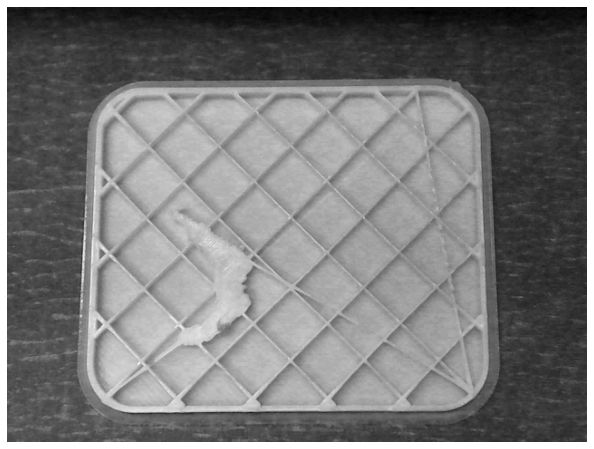

In [57]:
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [58]:
#SVD
U, S, VT = np.linalg.svd(X,full_matrices=False) #economy SVD therefor it is False
S = np.diag(S) #just extract the diagonal value from the S matrix computed in top.

In [59]:
X.shape

(480, 640)

In [63]:
U.shape

(480, 480)

In [61]:
VT.shape

(480, 640)

In [62]:
S.shape

(480, 480)

In [64]:
S

array([[5.22617785e+04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.41154152e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.67688765e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.89717276e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.55720407e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 2.89161084e+00]])

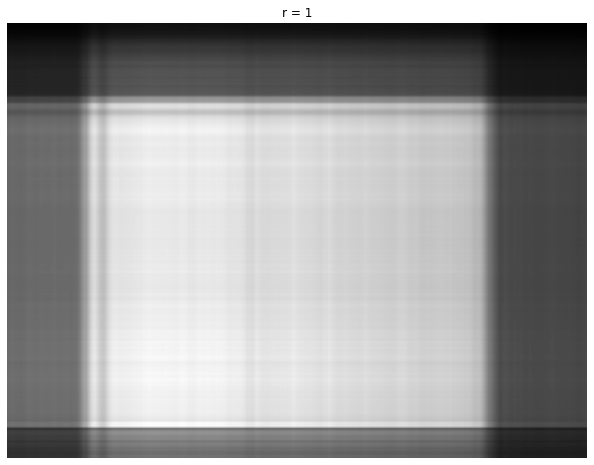

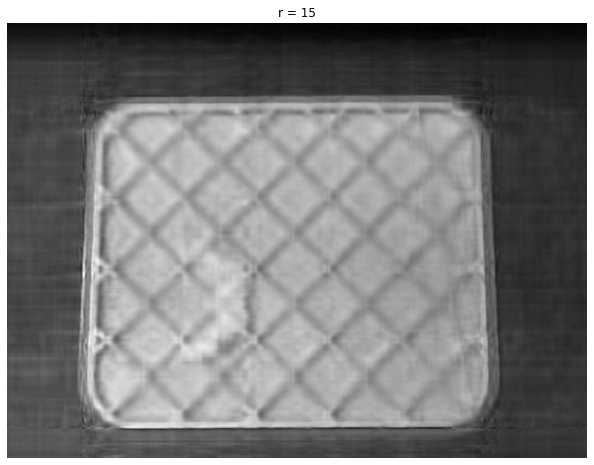

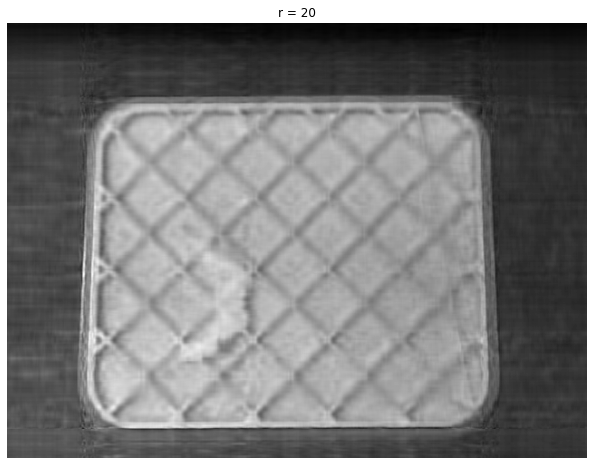

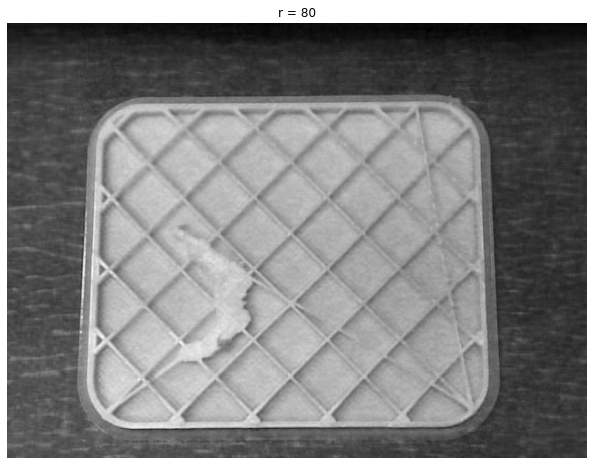

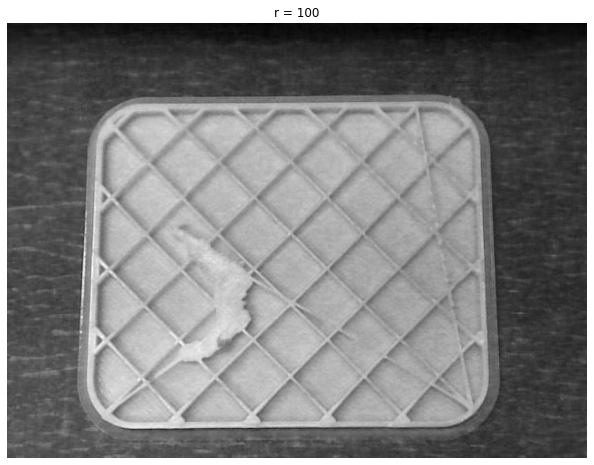

In [67]:
#construct reduced image
j = 0
for r in (1, 15,20,80, 100):
  Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:] #so take first r columns of U, r*r columns of S and r columns of V transponse
  plt.figure(j+1)
  j += 1
  img = plt.imshow(Xapprox)
  img.set_cmap('gray')
  plt.axis('off')
  plt.title('r = ' + str(r))
  plt.show()

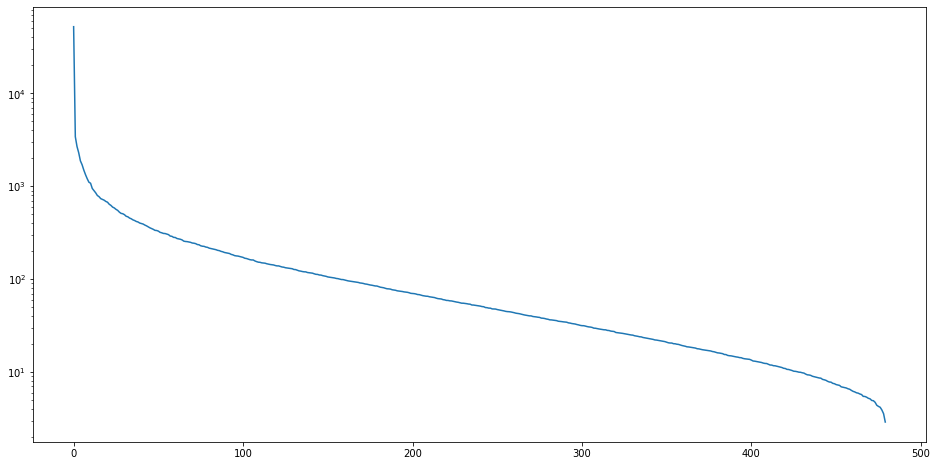

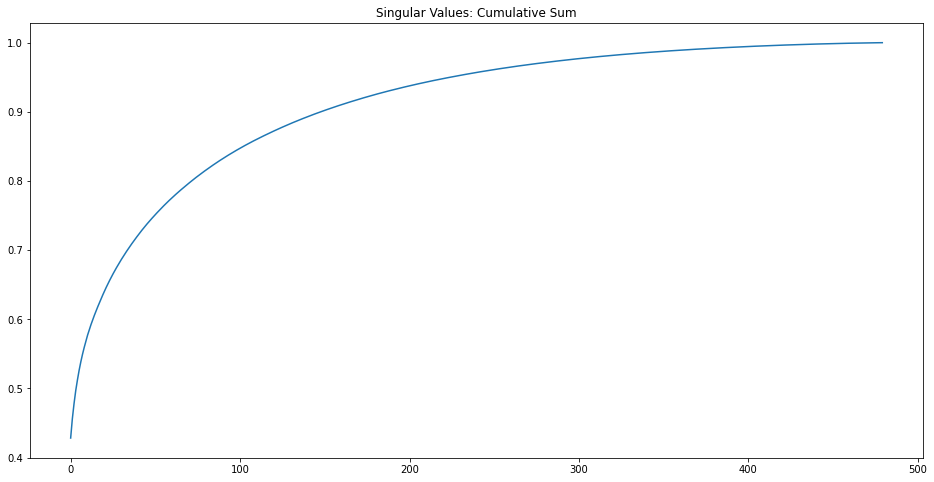

In [66]:
#plotting the singular values
plt.figure(1)
plt.semilogy(np.diag(S))
plt.show('Singular Values')
plt.show() # it is a logarithmic scale

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()
